In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#grouping dates and count
merged_data = pd.read_csv("C:/Users/anujb/Downloads/Fitness_Classes_Data/Fitness Classes Data/cleaned/Cleaned_Data.csv")

bookings_in_a_day = merged_data['BookingEndDateTime (Day/Month/Year)'].value_counts().sort_index().reset_index()
bookings_in_a_day.columns = ['BookingEndDateTime (Day/Month/Year)', 'No. of bookings']

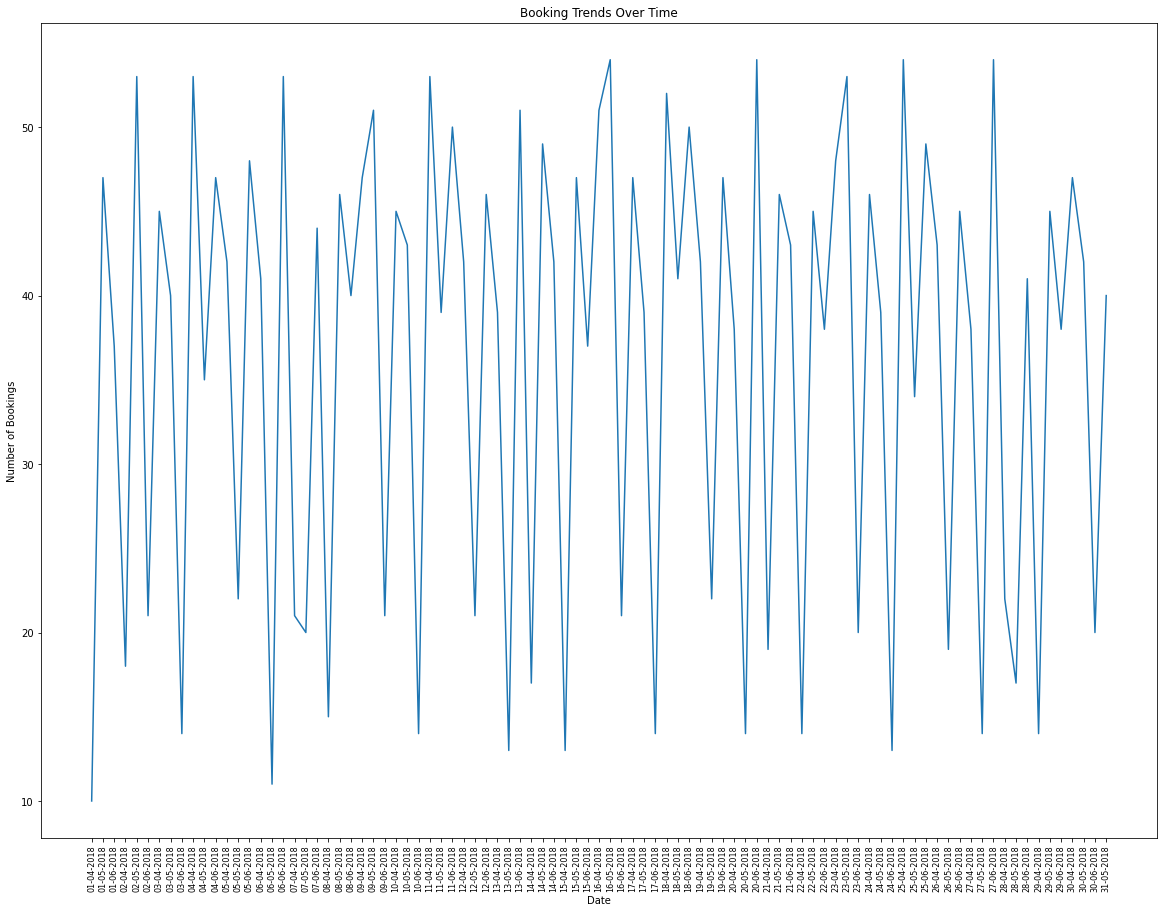

In [2]:
plt.figure(figsize=(20,15))
sns.lineplot(x='BookingEndDateTime (Day/Month/Year)', y='No. of bookings', data=bookings_in_a_day)
plt.title('Booking Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90, fontsize=8)
plt.show()

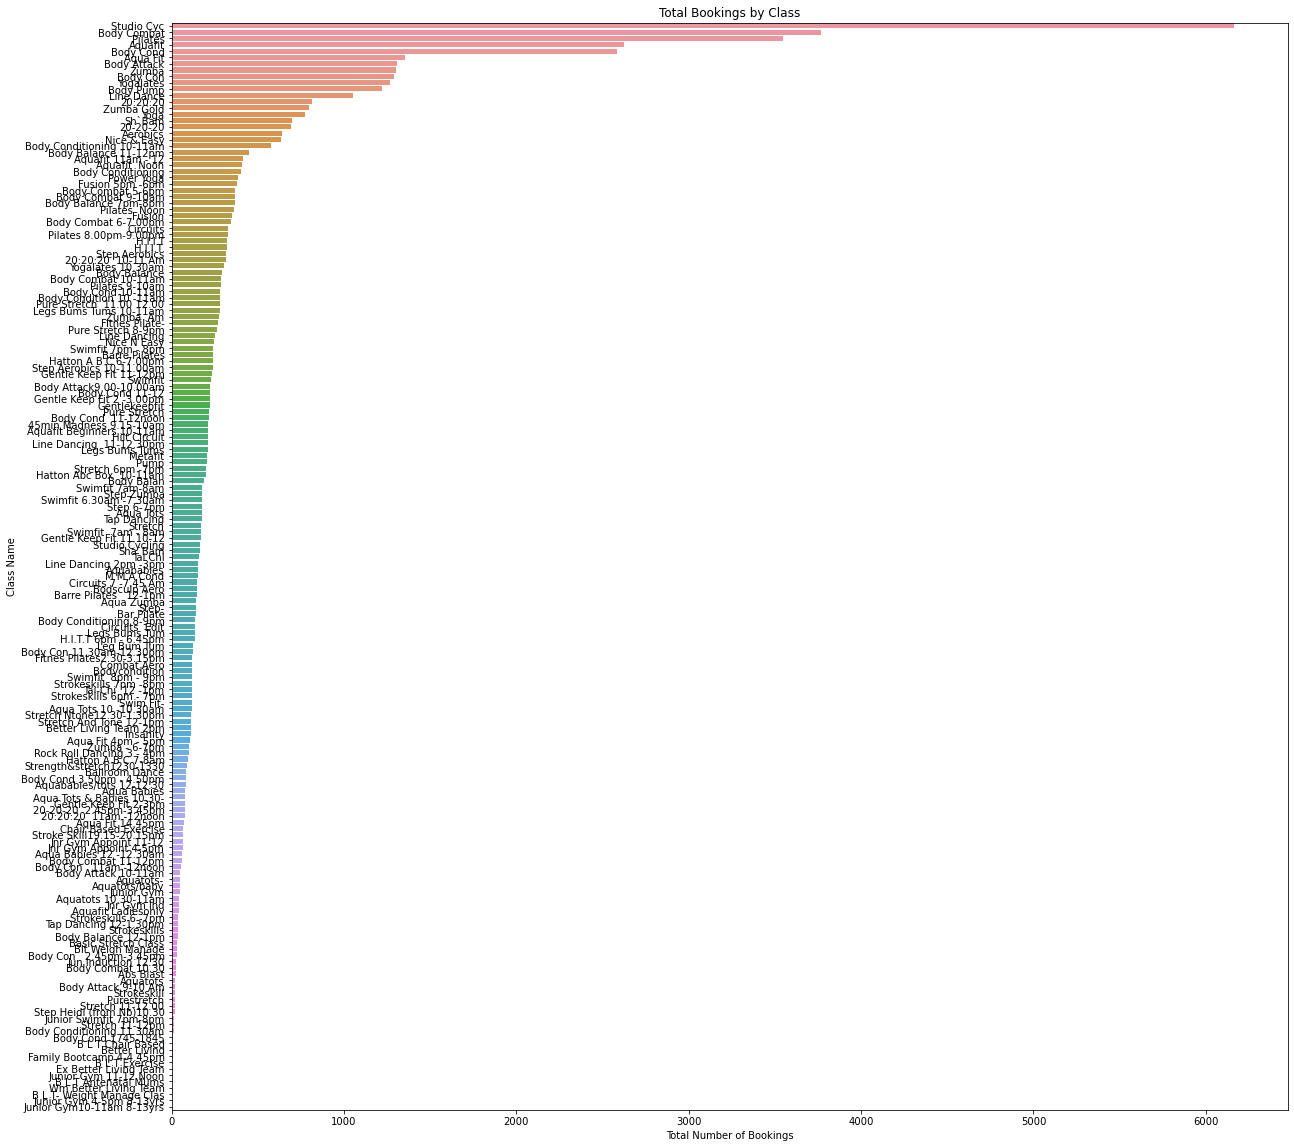

In [3]:
# Aggregate the total no. of bookings /class
bookings_per_class = merged_data.groupby('Class Name')['Number Booked'].sum().reset_index()

#bar chart
plt.figure(figsize=(20, 20))
sns.barplot(x='Number Booked', y='Class Name', data=bookings_per_class.sort_values(by='Number Booked', ascending=False))
plt.title('Total Bookings by Class')
plt.xlabel('Total Number of Bookings')
plt.ylabel('Class Name')
plt.show()

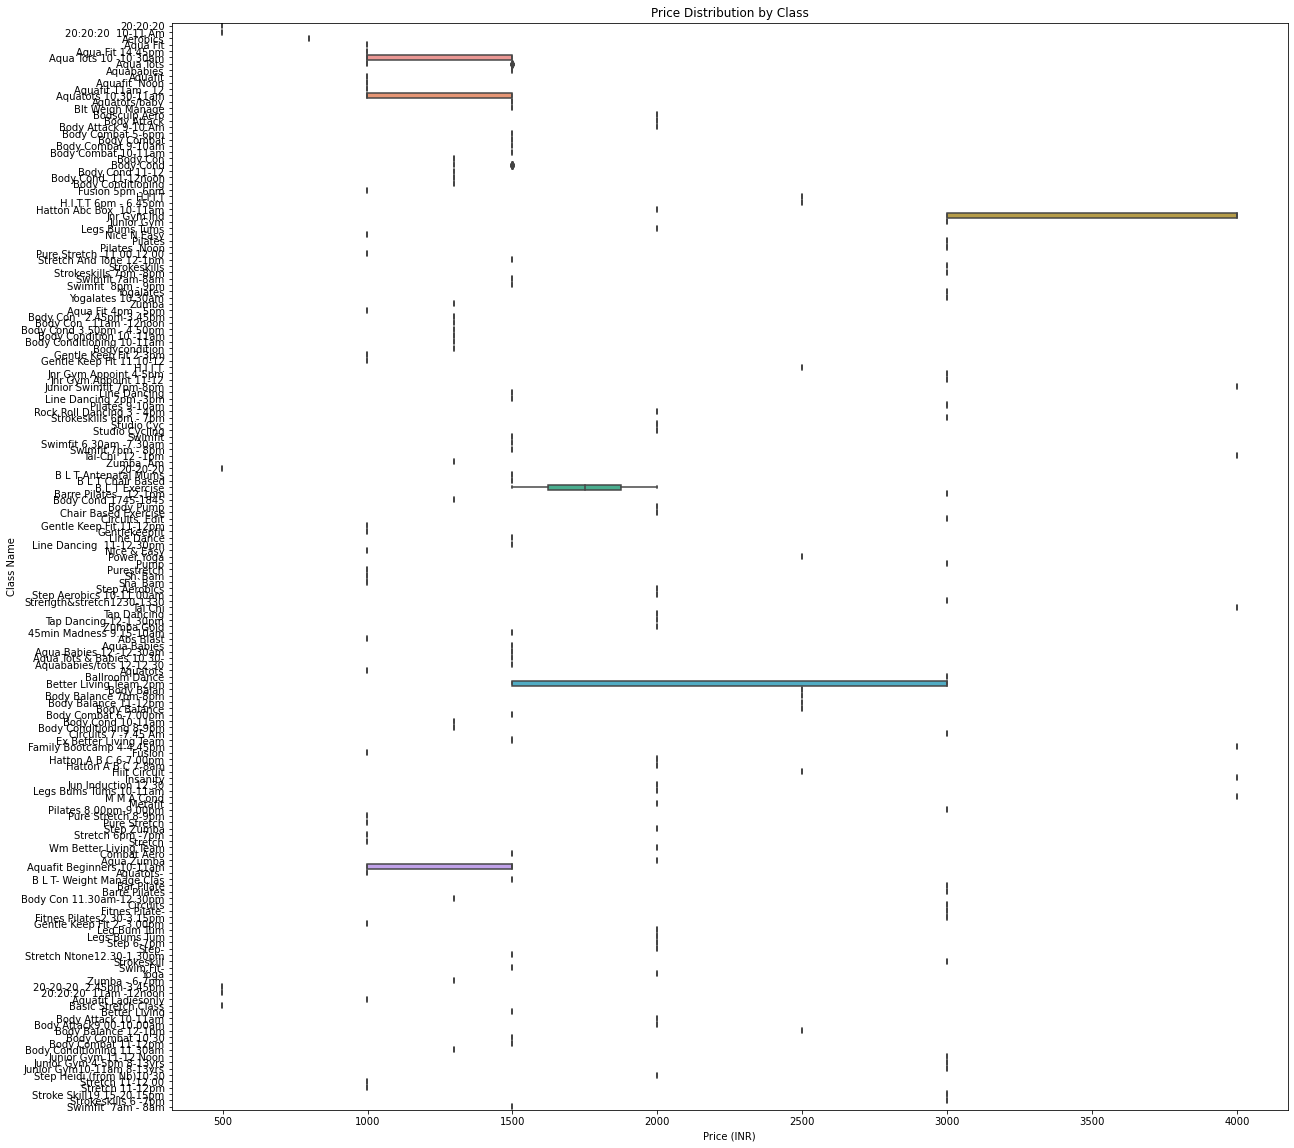

In [5]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Price (INR)', y='Class Name', data=merged_data)
plt.title('Price Distribution by Class')
plt.xlabel('Price (INR)')
plt.ylabel('Class Name')
plt.show()

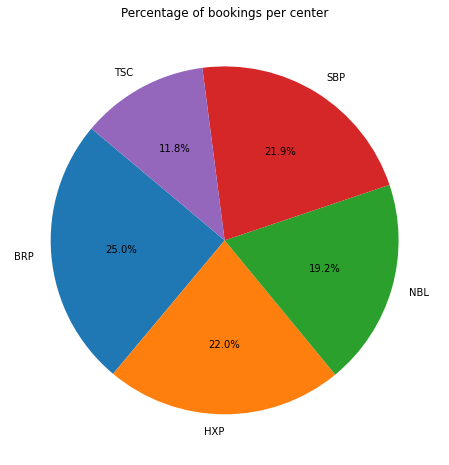

In [6]:
bookings_per_center = merged_data.groupby('ActivitySiteID')['Number Booked'].sum().reset_index()

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(bookings_per_center['Number Booked'], labels=bookings_per_center['ActivitySiteID'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of bookings per center')
plt.show()

In [7]:
#descriptive statistics
print(merged_data.describe())

        MaxBookees  Number Booked  Price (INR)
count  3289.000000    3289.000000  3289.000000
mean     32.179386      17.088781  1850.778656
std      15.092156       9.504098   790.894827
min       2.000000       1.000000   499.000000
25%      24.000000      10.000000  1299.000000
50%      30.000000      16.000000  1499.000000
75%      35.000000      24.000000  2499.000000
max      70.000000      64.000000  3999.000000


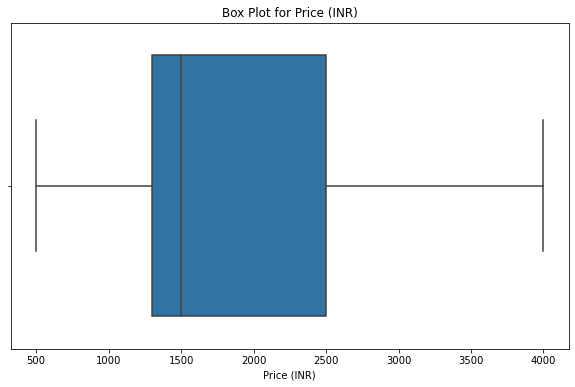

In [8]:
#Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price (INR)', data=merged_data)
plt.title('Box Plot for Price (INR)')
plt.xlabel('Price (INR)')
plt.show()

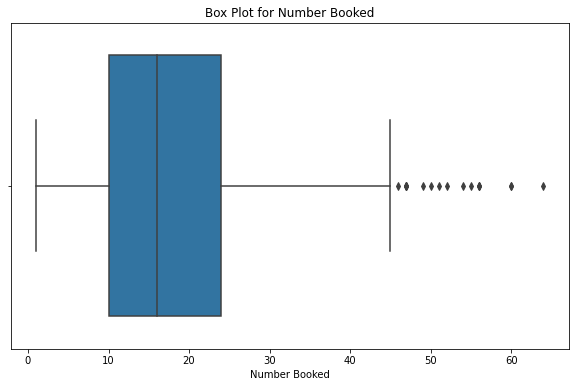

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number Booked', data=merged_data)
plt.title('Box Plot for Number Booked')
plt.xlabel('Number Booked')
plt.show()

In [10]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.count()

outliers_price = identify_outliers(merged_data, 'Price (INR)')
outliers_booked = identify_outliers(merged_data, 'Number Booked')

print(f"Outliers in Price (INR): \n{outliers_price}\n")
print(f"Outliers in Number Booked: \n{outliers_booked}\n")

Outliers in Price (INR): 
ActivitySiteID                         0
Class Name                             0
Class Timings                          0
BookingEndDateTime (Day/Month/Year)    0
BookingStartTime                       0
MaxBookees                             0
Number Booked                          0
Price (INR)                            0
dtype: int64

Outliers in Number Booked: 
ActivitySiteID                         17
Class Name                             17
Class Timings                          15
BookingEndDateTime (Day/Month/Year)    17
BookingStartTime                       17
MaxBookees                             17
Number Booked                          17
Price (INR)                            17
dtype: int64



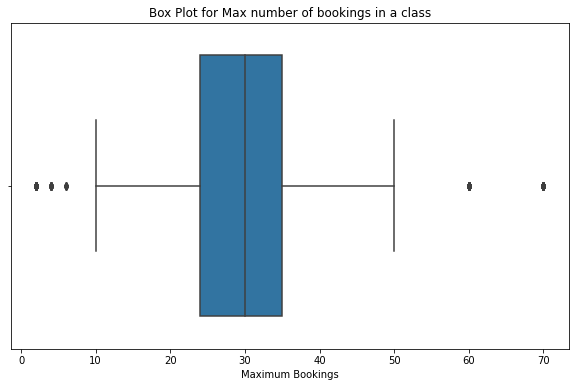

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaxBookees', data=merged_data)
plt.title('Box Plot for Max number of bookings in a class')
plt.xlabel('Maximum Bookings')
plt.show()

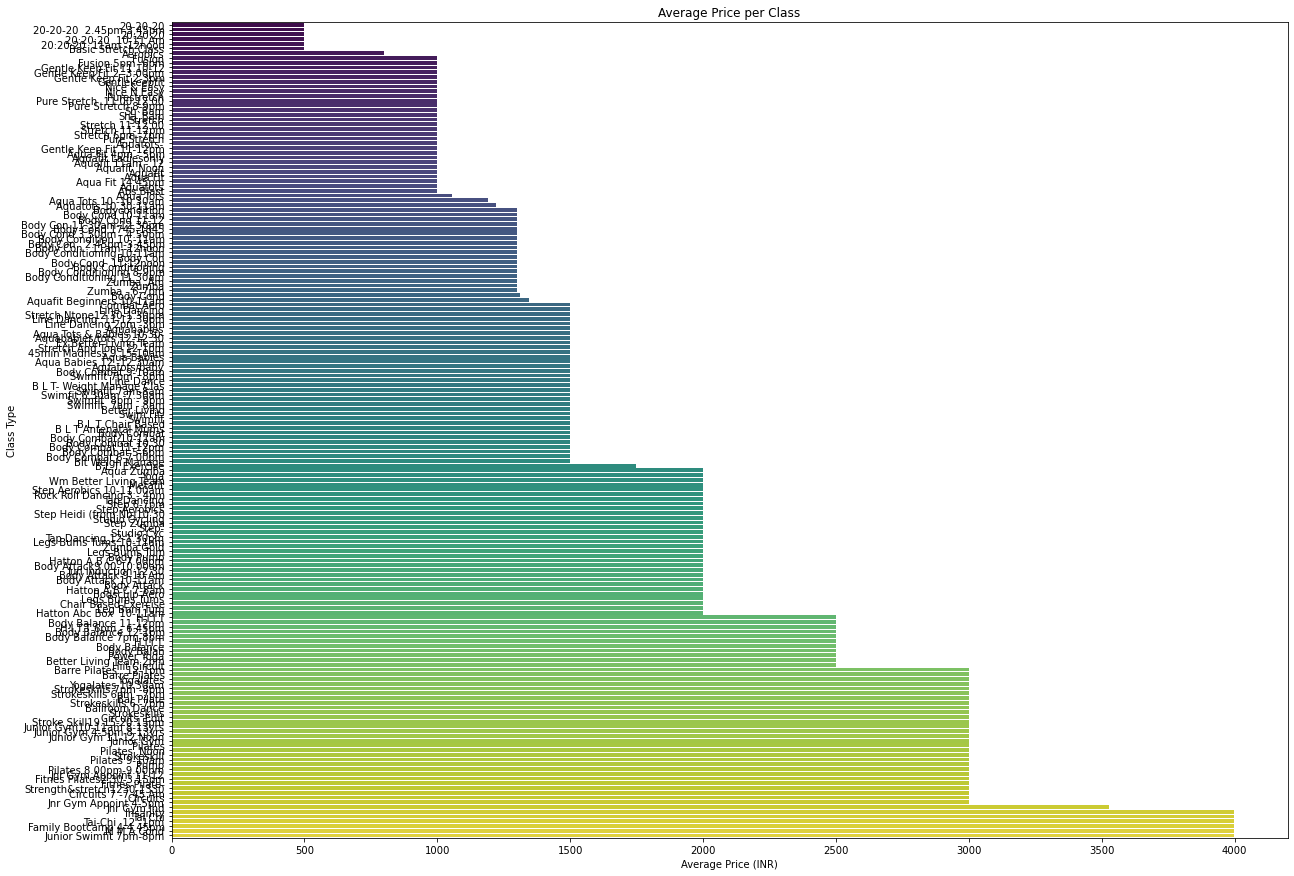

In [12]:
average_price_per_class = merged_data.groupby('Class Name')['Price (INR)'].mean().sort_values()
plt.figure(figsize=(20,15))
sns.barplot(x=average_price_per_class.values, y=average_price_per_class.index, palette='viridis')
plt.title('Average Price per Class')
plt.xlabel('Average Price (INR)')
plt.ylabel('Class Type')
plt.show()